## Final Project Submission

Please fill out:
* Student name: Deztany Jackson
* Student pace: self paced 
* Scheduled project review date/time: Friday December 23, 2022 11AM
* Instructor name:  Morgan Jones
* Blog post URL: http://dmvinedata.com/blog/


## Home Improvement House Predictions

### Authors: Deztany Jackson

# Business Understanding

## Overview

Real Estate agents in King County, Seattle are evaluating the neighborhoods to encourage home owners of he benefits of improving and upgrading their property value. Housing data from King County was used to develop linear regressions models to support future price prediction.  

The primary stakeholders are real estate agents because of their wide use cases, network, domain knowledge and their incentive for home owners to increase their property value. They can also use this for getting a jump start on  marketing to potential home buyers. The same predictions could be useful for the homeowners, potential buyers and even those in the remodeling and construction business. Because of their connection and  real estate agents are able to influence a larger community's property value which as greater impact than convinving individual homeowners. 
The area attracts new implants from tech jobs. A great number of these people (as singles or families) may be looking to buy or rent.

This model is used as an intial model supportingmedium course predictions.
The main attributes used to support model prediciton are: Condition and Grade.
The main attributes used to support model creation:
  I would not garuntee the price predicions are 100%
accurate.  
The model used accounts for 67% variability. This means there are things that the model still doesn account for 
in making predictions. 

 [Phase 1 Project Description](https://learning.flatironschool.com/courses/4964/pages/phase-2-project-description), 2022

# Data Understanding

In [ ]:
#Add a part where there is a description for the data used
#The waterfront to fill or delte moves to data prep
#Use a correlation matrix to understand the data more
#Fill out the questions of Data Understanding in the markdown section
#Descriptive statistis for each of the features used
#check shape is correct
#Add a new column for missing Waterfront prop? No, if we included view maybe

This project uses the King County House Sales dataset (from GitHub project repo). This can be found in several locations: [Git Hub Data](https://github.com/learn-co-curriculum/dsc-phase-2-project-v2-3/tree/main/data) & [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction). 

It is in the format of csv. The initial data used in the modeling will start with XX of possible attributes. As modeling progressing certain attributes (features) will be processed, transformed and possibly removed.



In [60]:
#Imports necessary intial libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

The imported data is the entire initial dataset. This will be scope down before the intial understanding to support the the core modeling needs


In [2]:
#Import of data to explore, make the id the index column
df = pd.read_csv('data/kc_house_data.csv', index_col=0)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

Showing the columns from the original dataset to remove

In [6]:
#df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

---

The start of the intial dataset used for the modeling

In [8]:
#Ignore these column at a minimum level Write assumption from the beginning data
""" Ignore data, view, sqft_above, sqft_basement, yr_renovated, zipcode,lat ,long ,sqft_living15, sqft_lot15"""

# The new dataset without the extra attributes
kc_df = df.drop(["date","view", "sqft_above", "sqft_basement", "yr_renovated","lat" ,"long" ,"sqft_living15", "sqft_lot15"], axis = 1)
kc_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
id,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955,98178
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,98125
5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,98028
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,98136
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,98074


Questions:
    
    - Do I need to copy the original dataset

Looking at the dataset to see the size, any null values and the data types of the original dataset we will work with

In [22]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.0+ MB


In [24]:
#Size of the data set
kc_df.shape

(21597, 11)

The following features are all numerical. The describe does not give statistics on categorical objects.
The features of "yr_built" and "zipcode" are nominal and used to name things.  The rest are numerical cardinal values. The names of the features are generally self explanatory and will stay the same.

### Initial Features Used
- **King County Table**
    - Rows: 21597 
    - Features: 11
    * "id" is not a feature used in the modeling
    
##### Cardinal Numbers

- ***price - (Target Variable)***
    - Description:
    - Expectation/Comment:
- **bedrooms**
    - Description:
    - Expectation/Comment:
- **bathrooms**
    - Description:
    - Expectation/Comment:
- **sqft_living**
    - Description:
    - Expectation/Comment:
- **sqft_lot**
    - Description:
    - Expectation/Comment:
- **floors**
    - Description:
    - Expectation/Comment: 
    
##### Nominal Numbers

- **yr_built**
    - Description:
    - Expectation/Comment:

- **zipcode**
    - Description:
    - Expectation/Comment:
    
##### Categorical Objects
- **waterfront**
    - Description:
    - Expectation/Comment:
- **condition**
    - Description:
    - Expectation/Comment:
- **grade**
    - Description:
    - Expectation/Comment:

### General Data Limitations

- Eliminating some of the features type of house - basement or rambler.   Useful in reporting but not model building.

In [9]:
# Numerical descriptions and statistics
kc_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676,98077.951845
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234,53.513072
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000,98001.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000,98199.000000


Viewing and counting the values of the categorical features.  We can assess what the best route to work with these is. Do we change to ordinal numbers or process this in the future using techniques like One Hot Encoding? For the "condition" and "grade" features  One Hot Encoding will be used.  

In [12]:
kc_df[["condition"]].value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
dtype: int64

In [ ]:
kc_df[["grade"]].value_counts()

The "waterfront" feature is the only feature that has "NaN". These values will be imputed with a value of "Unknown" than deleted or imputed with "No". The Null values make up over ~10% of the data set. This could impact training of the model adversly because the limited data. Less than 1% of the known homes have a waterfront view
"No" may seem like a conservative choice to inpute, but using "Unknown" allows future data exploration if more information becomes available.

In [19]:
kc_df[["waterfront"]].isna().value_counts()

waterfront
False         19221
True           2376
dtype: int64

In [16]:
kc_df[["waterfront"]].value_counts()

waterfront
NO            19075
YES             146
dtype: int64

If waterfront becomes a main feature it is good to understand which home types the Null is associated with.
It seems the "average"  and "good" grade home are traced to much of the Null values.  If they have space for home repar, having a more accurate
value of "waterfront" could turn out helpful for real estate agents to market.

In [17]:
#Checking to see which house types these Null values affect
kc_df[kc_df["waterfront"].isna()]["grade"].value_counts()

7 Average        1000
8 Good            656
9 Better          295
6 Low Average     228
10 Very Good      116
11 Excellent       42
5 Fair             30
12 Luxury           7
4 Low               2
Name: grade, dtype: int64

# Data Preparation

Data preparation happens throughout the modeling process in iteration as new information is known.
There will be some preparation (e.g.data transformation and scaling) that will happen as we split the training and test
data from one another.  This is to protect against data leakage.

In [26]:
#Remove the duplicate rows from data set
kc_df = kc_df.drop_duplicates()
kc_df.duplicated().sum()

0

Usually it is better to fill in "NaN" after train and test split to prevent data leakage.  
Because filling in unknown as no effect on the other features, decided to do it before.

In [36]:
#Replaces "NaN" with "Unk"
kc_df["waterfront"].fillna("Unk", inplace = True)

#Check NaN Count after replacing "NaN" with "Unk"
print("Values: ",kc_df[["waterfront"]].value_counts())

print("Waterfront Null Values:", kc_df[["waterfront"]].isna().sum())

Values:  waterfront
NO            19068
Unk            2376
YES             146
dtype: int64
Waterfront Null Values: waterfront    0
dtype: int64


Splitting the data training data a 80/20. The train/test split is used model validation. The model training is done of the training data and is separated from the test data. 

In [54]:
# Importing library to split the data into training and test data for model validation. 
from sklearn.model_selection import train_test_split

#dropping the target variable from the dataset features
X = kc_df.drop("price", axis=1)
# Setting the target variable
y = kc_df["price"]

#Setting the test size .
test_size = .2

#Using the basic train/test split. Adding a random state to product the random set each time.
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size= test_size, random_state=42)

Visualization of target variable: 
[Ref: Linear Reg Lab, #20](https://github.com/learn-co-curriculum/dsc-linear-regression-lab/tree/solution) 
Most of the housing prices are are less than 1 million dollars.

(0.0, 5000000.0)

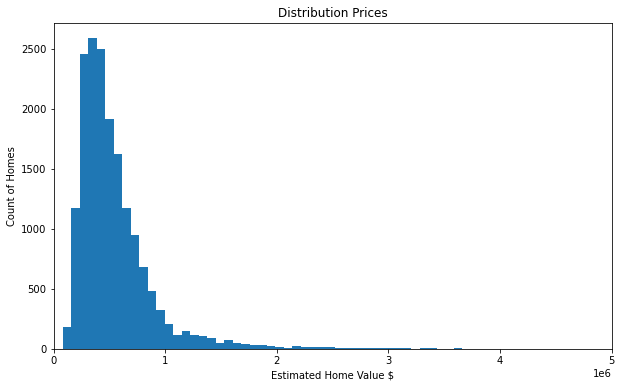

In [55]:
#Setting the frame and figsize
fig, ax = plt.subplots(figsize=(10, 6))

#Plotting the training portion of the target variables
ax.hist(y_train, bins=100)

#Setting labels and titles
ax.set_xlabel("Estimated Home Value $")
ax.set_ylabel("Count of Homes")
ax.set_title("Distribution Prices")

#Setting limit on the x axis
plt.xlim([0, 5000000])

# Baseline Model (1)


###  Initial Correlation

The initial linear regression model will be done with the most correlated feature. This will be considered our
baseline model.  From here we will do severation iterations to see if we can improve the model's performance.


Check for the highest correlated values to the target variable price. 
Correlation works on numerical values, not categorical ones.


In [64]:
#Print out correlation values in dataframe
corr = kc_df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode
price,1.000000,0.308835,0.525933,0.701938,0.089868,0.256948,0.054015,-0.053381
bedrooms,0.308835,1.000000,0.514567,0.578211,0.032448,0.178196,0.155831,-0.154143
bathrooms,0.525933,0.514567,1.000000,0.755813,0.088396,0.502788,0.507247,-0.204782
sqft_living,0.701938,0.578211,0.755813,1.000000,0.173423,0.354350,0.318431,-0.199751
sqft_lot,0.089868,0.032448,0.088396,0.173423,1.000000,-0.004664,0.053100,-0.129583
floors,0.256948,0.178196,0.502788,0.354350,-0.004664,1.000000,0.488904,-0.059711
yr_built,0.054015,0.155831,0.507247,0.318431,0.053100,0.488904,1.000000,-0.347430
zipcode,-0.053381,-0.154143,-0.204782,-0.199751,-0.129583,-0.059711,-0.347430,1.000000


Correlation Graph: [Ref: Linear Reg Lab, #20](https://github.com/learn-co-curriculum/dsc-linear-regression-lab/tree/solution) 

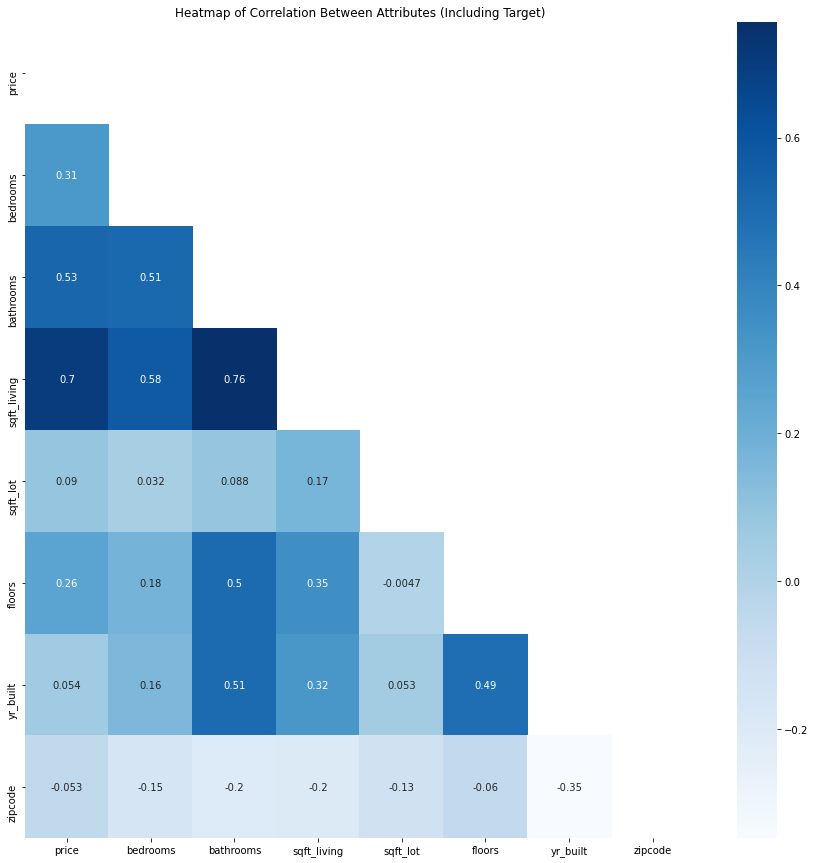

In [66]:
# Set up figure and axes
fig, ax = plt.subplots(figsize=(15, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    #Color of the heatmap
    cmap="Blues",
    # Specifies that we want labels, not just colors
    annot=True,
    
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

"sqft_living" has a .7 correlation with the "price"

In [69]:
#Strongest numerical feature from the heatmap
most_correlated_feature = "sqft_living"

(150.0, 7500.0)

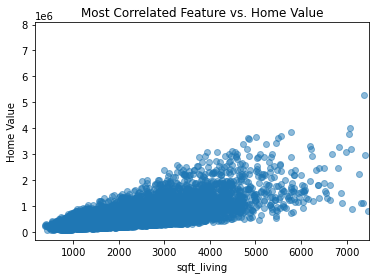

In [78]:
#Plot a scatter plot "Most Correlated Feature vs. Home Value"
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("Home Value")
ax.set_title("Most Correlated Feature vs. Home Value Price");
plt.xlim([150, 7500])

The graph shows a fairly linear data between 300 and 5000 sqft of living.  The larger the sqft gets the more outliers.

### Modeling

Modeling the baseline feature using the basic train/test split first then a kfold validation methog

### Baseline Model - Basic Train Test Split

In [83]:
#Reshape training data to support modeling without error
X_train[most_correlated_feature]
X_array = np.array(X_train[most_correlated_feature])
newarr = X_array.reshape(-1,1)

#Reshape the test data to support modeling without error
X_test[most_correlated_feature]
X_array_test = np.array(X_test[most_correlated_feature])
newarr_test = X_array_test.reshape(-1,1)

In [88]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [89]:
linreg.fit(newarr, y_train)
LinearRegression()

LinearRegression()

In [92]:
#Add print out of previous models to keep reviweing

y_hat_train = linreg.predict(newarr)
y_hat_test = linreg.predict(newarr_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
Model_train_score = linreg.score(newarr,y_train)
Model_score = linreg.score(newarr_test,y_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)
print('Train Model Score: ', Model_train_score)
print('Test Model Score: ', Model_score)


Train Mean Squared Error: 67486348322.85598
Test Mean Squared Error:  72486529163.63557
Train Model Score:  0.4924392962767362
Test Model Score:  0.4933621300965373


Test Mean Squared Error is better than the Training Error. The base model score R2 is only .49. This base mode isn't strong enough to support predicting prices.  There may be better features or a combination of a few that hopefully will increase the score.

In [ ]:
#Do I need to get teh MAE and RMSE as well? Reference Template solutions GP if so


### Baseline Model- Kfold Validation

The Kfold score will be a mean of the various splits.

In [ ]:
#dropping the target variable from the dataset features
X = kc_df.drop("price", axis=1)
# Setting the target variable
y = kc_df["price"]

In [93]:
baseline_model = LinearRegression()

In [141]:
from sklearn.model_selection import cross_validate, ShuffleSplit

#Splitting the dataset in three sections with a .3 test size
splitter = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

#Baseline scores using kfold cross validation
#Most correlated feature - sqft_living

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X[[most_correlated_feature]],
    y=y,
    return_train_score=True,
    cv=splitter
)


#Mean of the validation scores
print("Current Kfold Train score:     ", baseline_scores["train_score"].mean())
print("Current Kfold Validation score:", baseline_scores["test_score"].mean())
print()
#Validation Scores
print('Previous Train/Test Split Train Model Score: ', Model_train_score)
print('Previous Train/Test Split Test Model Score: ', Model_score)



Current Kfold Train score:      0.4897870088702527
Current Kfold Validation score: 0.5038514031437736

Previous Train/Test Split Train Model Score:  0.4924392962767362
Previous Train/Test Split Test Model Score:  0.4933621300965373


The Kfold method offers a higher validation mean score (.504) than the previous Train/Test score.  Both offer a higher score than their training score. 

# Second Model with Categories and Numerical Features (2)

Redo these models with Kfold cross validation

In [ ]:
#Convert categorical features into numbers - some are numbers with categories as well
# Run this cell without changes

print(X_train["waterfront"].value_counts())
print()
print(X_train["condition"].value_counts())
print()
print(X_train["grade"].value_counts())

In [ ]:
#Model the features 
#https://github.com/Dmvinedata/linear_regression_guided_practice/blob/master/2022-08-15/.ipynb_checkpoints/linear_regression_advanced-checkpoint.ipynb

In [ ]:
X_train[continuous].hist(figsize  = [16, 16]);

In [ ]:
#  import OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler

continuous = ['bedrooms', 'sqft_living','sqft_lot','floors',"bathrooms", "yr_built", "zipcode"]
categoricals = ['waterfront', 'condition', 'grade']

X = kc_df.drop("price", axis=1)
y = kc_df["price"]

# Create new split
X_train_sec, X_test_sec, y_train_sec, y_test_sec = train_test_split(X, y, test_size=.3, random_state=42)

In [ ]:
#Setting column names for one hot encoded variables - Ref https://www.codementor.io/@abdelfettahbesbes/one-hot-encoding-in-data-science-1pe0lftu21
categoricals
cat_cols_encoded = []
for col in categoricals:
    cat_cols_encoded += [f"{col[0:2]}_{cat}" for cat in list(X[col].unique())]


In [ ]:

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(sparse=False) # did not drop the first one
scaler = Normalizer()


# Fit and/or transform - Better
X_train_log = log_transformer.fit_transform(X_train_sec[continuous])
X_train_scale = scaler.fit_transform(X_train_log )
X_train_ohe = ohe.fit_transform(X_train_sec[categoricals])




#Concatenate transformed data
X_train_sec = pd.concat([
        pd.DataFrame(X_train_scale, columns= continuous, index=X_train_sec.index),
        pd.DataFrame(X_train_ohe, columns = cat_cols_encoded, index=X_train_sec.index)
    ], axis=1)

    
# Transform and concatenate test data
log_X_test = log_transformer.transform(X_test_sec[continuous])
normalized_X_test = scaler.transform (log_X_test)

#Remember there might be data leackage with using the same columsn for test
X_test_sec = pd.concat([
    pd.DataFrame(normalized_X_test,columns= continuous, index=X_test_sec.index),
    pd.DataFrame(ohe.transform(X_test_sec[categoricals]),columns = cat_cols_encoded,index=X_test_sec.index)
], axis=1)

In [ ]:
#Drop the first col of each ohe CAT 
X_train_sec= X_train_sec.drop(['wa_Unk','co_Average','gr_7 Average'], axis=1)
X_test_sec= X_test_sec.drop(['wa_Unk','co_Average','gr_7 Average'], axis=1)

In [ ]:
linreg2 = LinearRegression()

In [ ]:
linreg2.fit(X_train_sec, y_train_sec)

In [ ]:
y_hat_train = linreg2.predict(X_train_sec)
y_hat_test = linreg2.predict(X_test_sec)

In [ ]:
train_mse = mean_squared_error(y_train_sec, y_hat_train)
test_mse = mean_squared_error(y_test_sec, y_hat_test)
Model_train_score = linreg2.score(X_train_sec,y_train_sec)
Model_score = linreg2.score(X_test_sec, y_test_sec)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)
print('Train Model Score: ', Model_train_score)
print('Test Model Score: ', Model_score)



In [ ]:
#plotting the linearity zoomed in
fig, ax = plt.subplots(figsize = (10,10))

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, y_hat_test, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
plt.xlim([0, 1000000])
ax.legend();

With the results of the second model, it seems that the model is overfit for the training model.
The MSE an R2 are higher now that we used more of the data and transformed the categories with OHE.

# Investigating Multicollinearity

In [ ]:
import statsmodels.api as sm

sm.OLS(y_train_sec, sm.add_constant(X_train_sec)).fit().summary()

In [ ]:
#Which ones would you eliminate based on p value

Looks like there is a lot of multicolinearity in the model. The features that are above the p-value are: . We will run RFE to see if some of the same values are chosen

# 3rd Model with RFECV

In [ ]:
#2nd iteration of the model with kfold instead of test split and RFECV Ref Linear Algebra Lab
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=2, test_size=0.3, random_state=42)

X_train_for_RFECV = StandardScaler().fit_transform(X_train_sec)

model_for_RFECV = LinearRegression()


# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_sec.columns):
    print(f"{col}: {selector.support_[index]}")

# Create a third model with the best features to use
#After the best R2 reached plot somehow
#Report error



In [ ]:
X_train_third.columns

In [ ]:
#cROSS Valition

third_model = LinearRegression()

splitter = ShuffleSplit(n_splits=6, test_size=0.2, random_state=42)

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", third_model_scores["train_score"])
print("Validation score:", third_model_scores["test_score"])
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())

In [ ]:
#Drop the first col of each ohe CAT 
X_train_third= X_train_sec.drop(['wa_NO','co_Very Good','co_Poor', "gr_9 Better"], axis=1)
X_test_third= X_test_sec.drop(['wa_NO','co_Very Good','co_Poor', "gr_9 Better"], axis=1)

In [ ]:
# Random pair trials

# Replace None with appropriate code

final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_third, y_train_sec)

# Score the model on X_test_final and y_test
final_model.score(X_test_third, y_test_sec)


# A Few coefficients - Delete

In [ ]:
X_train_third.columns

In [ ]:
#Drop the first col of each ohe CAT 
chosen_col = ['sqft_living', "bedrooms","gr_4 Low"]
X_train_few= X_train_sec[chosen_col ]
X_test_few= X_test_sec[chosen_col ]

In [ ]:
# Random pair trials

# Replace None with appropriate code

final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_few, y_train_sec)

# Score the model on X_test_final and y_test
final_model.score(X_test_few, y_test_sec)

# Final model

In [ ]:
best_features = X_train_third.columns

In [ ]:
# Final Model - Which test and training set do you use. One that isnt manipulated or standardized

# Do you have your hold out test set

# Replace None with appropriate code

final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X[best_features], y)

# Score the model on X_test_final and y_test
final_model.score(X_test_third, y_test_sec)

In [ ]:
# User friendly MEtrics

# Interprest final Model

# Polynomial Feature Check

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [ ]:

continuous = ['bedrooms', 'sqft_living','sqft_lot','floors',"yr_built", "zipcode"]
categoricals = ['waterfront', 'condition', 'grade']

X = kc_df.drop("price", axis=1)
y = kc_df["price"]

# Create new split
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X[continuous], y, test_size=.3, random_state=42)

In [ ]:
degree = 3 #Highest degree before going to negative number

In [ ]:
# cROSS VALIDATION AND TRAIN TEST SPLIT
poly = PolynomialFeatures(degree)
X_poly_train = poly.fit_transform(X_train_poly)

In [ ]:
reg_poly = LinearRegression()
scores_complex3 = cross_validate(
                        reg_poly,X_poly_train, y_train, cv=5, 
                        return_train_score=True
)
scores_complex3

In [ ]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(degree)
    
# Fit and transform X_train
X_poly_train = poly.fit_transform(X_train_poly)
    
# Instantiate and fit a linear regression model to the polynomial transformed train features
reg_poly = LinearRegression().fit(X_poly_train, y_train_poly)    

# Transform the test data into polynomial features
X_poly_test = poly.transform(X_test_poly)
    
# Get predicted values for transformed polynomial test data  
y_pred = reg_poly.predict(X_poly_test)
    
#Evaluate model performance on test data
print("degree %d" % degree, r2_score(y_test, y_pred))
    
# Transform the full data
X_poly = poly.transform(X[continuous])
    
# Now, we want to see what the model predicts for the entire data  
y_poly = reg_poly.predict(X_poly)

In [ ]:
#Interpret Model  - msE LOOK AT linear regression lab to see BUSINESS interpretation

In [ ]:
#Transform data set by changing the condition or grade and try to predict on final model



# Model Prediction

A real estate agent would be better useful if it targets speciic areas versus random houses all over the County.
They could target similar grade and condition houses for improvement.  The grade and contion does not account 
for all of the things that would create a comp but these will the scope for this analysis

In [13]:
#Zipcode group by to create focus of data set to predict with in the future
zip_df = kc_df.groupby(["grade", "zipcode"], sort = True).count()
a = zip_df.sort_values("grade", ascending = True)
a

price  bedrooms  bathrooms  sqft_living  sqft_lot  \
grade         zipcode                                                      
10 Very Good  98001        5         5          5            5         5   
              98074       80        80         80           80        80   
              98075      120       120        120          120       120   
              98077       36        36         36           36        36   
              98092       10        10         10           10        10   
              98102        6         6          6            6         6   
              98103        4         4          4            4         4   
              98105       17        17         17           17        17   
              98106        1         1          1            1         1   
              98107        1         1          1            1         1   
              98109        6         6          6            6         6   
              98112       37        37         37           37        37   
              98115       10        10         10           10        10   
              98116       11        11         11           11        11   
              98117       12        12         12           12        12   
              98118        8         8          8            8         8   
              98119        9         9          9            9         9   
              98122        9         9          9            9         9   
              98125        1         1          1            1         1   
              98126        1         1          1            1         1   
              98136        6         6          6            6         6   
              98144       14        14         14           14        14   
              98146        2         2          2            2         2   
              98155        2         2          2            2         2   
              98166        6         6          6            6         6   
              98168        1         1          1            1         1   
              98177       15        15         15           15        15   
              98178        1         1          1            1         1   
              98188        2         2          2            2         2   
              98199       33        33         33           33        33   
              98072       25        25         25           25        25   
              98070        3         3          3            3         3   
              98198        2         2          2            2         2   
              98059       16        16         16           16        16   
              98065       16        16         16           16        16   
              98003       10        10         10           10        10   
              98004       57        57         57           57        57   
              98005       15        15         15           15        15   
              98007       15        15         15           15        15   
              98008        9         9          9            9         9   
              98010        9         9          9            9         9   
              98011        5         5          5            5         5   
              98014        2         2          2            2         2   
              98019        4         4          4            4         4   
              98022        2         2          2            2         2   
              98023       20        20         20           20        20   
              98024        4         4          4            4         4   
              98027       44        44         44           44        44   
              98028        6         6          6            6         6   
              98006       76        76         76           76        76   
              98030        3         3          3            3         